# TODO
- #TODO: Clean validation data
- #TODO: 192x192
- #TODO: NO VALIDALTION ON augm
- #TODO: 16 epoch nur Center + flip, dann mit R/L und ausblendfenster geradeaus
- #TODO: PUT EMPHASIS VON SHARP CORNERS!!
- NO image resize
- image translation

1. Upload curves3 to server - ok
2. train simple3, D, 2 more - ok
3. clean up code
4. write readme
5. submit

 - KEINE SCALIERUNG
 - KEIN YUV

In [28]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)
print('reloaded')
MODEL = "nvidia"

reloaded


(160, 320, 3) uint8


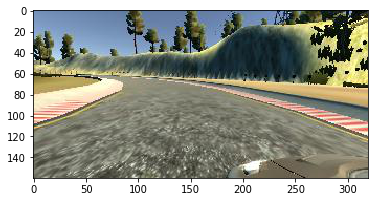

In [29]:
img1 = plt.imread('/mnt/data/dataset4_beta_sim/IMG/left_2017_02_11_17_49_46_987.jpg')
print(img1.shape, img1.dtype)
plt.imshow(img1)

(160, 320, 3) uint8
Tensor("Squeeze_5:0", shape=(66, 200, 3), dtype=float32)


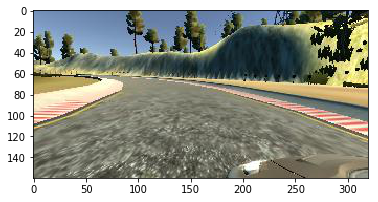

In [30]:
import cv2
import tensorflow as tf
img2 = cv2.imread('/mnt/data/dataset4_beta_sim/IMG/left_2017_02_11_17_49_46_987.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(img2.shape, img2.dtype)
plt.imshow(img2)

#img = img[60:135, : ]
img2 = tf.image.resize_images(img2, (66, 200))
print(img2)
#plt.imshow(img)
#plt.imshow(img2)
#print(img.shape)

# Training Episode 1 (beta sim, center only)

split data into 6031 training sample and 1508 validation samples
Number of samples:            37695
Number of active sample:      4524
Number of training samples:   4022
Number of validation samples: 502


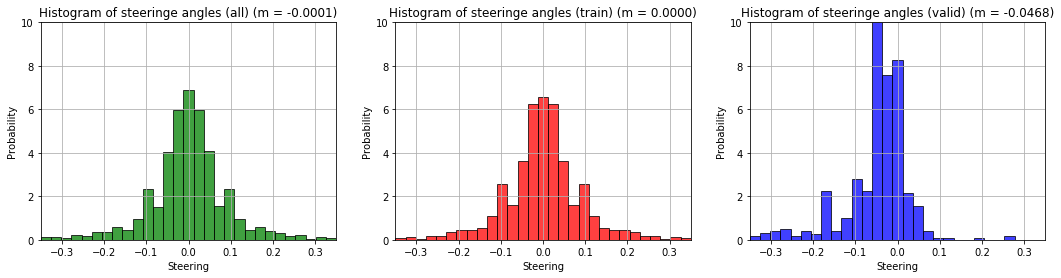

loading images to ram...
all images loaded to ram


In [31]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
# NO SHUFFLING!
datagen.split(valid_size=0.2)
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [32]:
datagen.data

,img,steering,throttle,brake,speed,cam,filter,flip,is_train,is_valid,is_active
0,dataset4_beta_sim/IMG/left_2017_02_11_17_49_46...,0.0,0.0,0.0,7.300583e-06,L,mod_identity,1,False,True,False
1,dataset4_beta_sim/IMG/mod_lighting_left_2017_0...,0.0,0.0,0.0,7.300583e-06,L,mod_lighting,1,False,True,False
2,dataset4_beta_sim/IMG/mod_blur_left_2017_02_11...,-0.0,0.0,0.0,7.300583e-06,L,mod_blur,-1,False,True,False
3,dataset4_beta_sim/IMG/left_2017_02_11_17_49_46...,-0.0,0.0,0.0,7.300583e-06,L,mod_flip,-1,False,True,False
4,dataset4_beta_sim/IMG/mod_shadow_left_2017_02_...,0.0,0.0,0.0,7.300583e-06,L,mod_shadow,1,False,True,False
5,dataset4_beta_sim/IMG/right_2017_02_11_17_49_4...,0.0,0.0,0.0,7.300583e-06,R,mod_identity,1,False,True,False
6,dataset4_beta_sim/IMG/mod_lighting_right_2017_...,0.0,0.0,0.0,7.300583e-06,R,mod_lighting,1,False,True,False
7,dataset4_beta_sim/IMG/mod_blur_right_2017_02_1...,0.0,0.0,0.0,7.300583e-06,R,mod_blur,1,False,True,False
8,dataset4_beta_sim/IMG/right_2017_02_11_17_49_4...,-0.0,0.0,0.0,7.300583e-06,R,mod_flip,-1,False,True,False
9,dataset4_beta_sim/IMG/mod_shadow_right_2017_02...,-0.0,0.0,0.0,7.300583e-06,R,mod_shadow,-1,False,True,False


In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.train_generator(datagen, "20170810_A", nb_epoch = 10)
model.plot_history();

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/10
3968/4022 [============================>.] - ETA: 0s - loss: 0.0747 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


# Training Episode 2 (beta sim, cam L/R)

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
datagen.add_dataset("dataset5_beta_backwards", use_original_data = True)
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170810_A", 9)
model.train_generator(datagen, "20170810_B", nb_epoch = 10)
model.plot_history();

# Training Episode 5: all-in

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
datagen.add_dataset("dataset6_curve2A", use_original_data = True)
datagen.add_dataset("dataset7_curve2B", use_original_data = True)
datagen.add_dataset("dataset8_curve3A", use_original_data = True)
datagen.add_dataset("dataset8_curve3B", use_original_data = True)
datagen.add_dataset("dataset8_curve3C", use_original_data = True)
datagen.add_dataset("dataset8_curve3D", use_original_data = True)
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170810_B", 9)
model.train_generator(datagen, "20170810_C", nb_epoch = 20)
model.plot_history();

# FAVORIT: 20170213_C, Epoch 2

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
datagen.add_dataset("dataset6_curve2A", use_original_data = True)
datagen.add_dataset("dataset7_curve2B", use_original_data = True)
datagen.add_dataset("dataset8_curve3A", use_original_data = True)
datagen.add_dataset("dataset8_curve3B", use_original_data = True)
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.18)
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170810_C", 19)
model.train_generator(datagen, "20170810_D", nb_epoch = 20)
model.plot_history();

In [ ]:
1/0

# ----------------------- AKTUELL --------------------

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_D2", 6)
model.train_generator(datagen, "20170213_E1", nb_epoch = 5, lr=0.0005)
model.plot_history();

# FAVORIT: 20170213_D2, Epoch 6 --> Kurve 3

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
#datagen.add_dataset("dataset6_curve2A")
#datagen.add_dataset("dataset7_curve2B")
datagen.add_dataset("dataset8_curve3A")
datagen.add_dataset("dataset8_curve3B")
datagen.add_dataset("dataset8_curve3C")
datagen.add_dataset("dataset8_curve3D")
datagen.shuffle()
datagen.split(valid_size=0.3) 
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.19)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_D2", 6)
model.train_generator(datagen, "20170308_XE", nb_epoch = 4) # TODO Learning Rate
model.plot_history();

# FAVORIT: 20170213_XA, Epoch 5 --> Kurve 3

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
#datagen.add_dataset("dataset4_beta_sim")
#datagen.add_dataset("dataset6_curve2A")
#datagen.add_dataset("dataset7_curve2B")
datagen.add_dataset("dataset8_curve3A")
datagen.add_dataset("dataset8_curve3B")
datagen.add_dataset("dataset8_curve3C")
datagen.add_dataset("dataset8_curve3D")
datagen.shuffle()
datagen.split(valid_size=0.3) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.70)
datagen.correct_camera_steering(0.18)
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.70)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170308_XA", 4)
#model.train_generator(datagen, "20170308_YA", nb_epoch = 8) # TODO Learning Rate
model.train_generator(datagen, "20170308_YD", nb_epoch = 3) # TODO Learning Rate
model.plot_history();

In [ ]:
1/0

# Training Episode 3 *alternativ* (backward data + beta) --> ÜBERSPRUNGEN

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.20)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_C", nb_epoch = 10) # lr=0.01
model.plot_history();

# Training Episode 4: refinement

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
#datagen.activate_mod('mod_lighting')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_D", nb_epoch = 12)
model.plot_history();

In [ ]:
1/0

In [ ]:
replacer = lambda x: x.replace('IMG_preprocessed', 'IMG')
datagen.data['img'] = datagen.data['img'].apply(replacer)
x = datagen.data['img'].get_values()
print(x)